# Assignment 1
## Student Name: REVATHY SIVASANKARAN
## Student Number: 1004622269


# Data Cleaning

importing pandas and numpy

In [1]:
import numpy as np
import sys
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Revathy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
generic_tweets = open('generic_tweets.txt', 'r')        
data = generic_tweets.read()   #Read Every Charater till the End of the Line
generic_data = [i for i in data.splitlines() if i.strip()!=''] #Strip any leading and trailing white spaces
generic_data

['"class","id","date","query","user","text"',
 '"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"',
 '"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"',
 '"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"',
 '"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "',
 '"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? because I can\'t see you all over there. "',
 '"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei

Reading the given file using pandas

In [5]:
import pandas as pd
airlines_tweets = pd.read_csv("US_airline_tweets.csv")        
airlines_tweets['text'][0]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [9]:
tweets = pd.read_csv("generic_tweets.txt")
tweets[0:5]

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


checking code for removal of html tags and attributes

In [10]:
import re # removal of html characters 
a= '< asdas d> asdsa ( asds) <\>'
a= re.sub('<[^<]+?>', '', a)

slicing dataframe by selcting only text column

In [11]:
df=tweets[['text']]
df[0:6]

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
5,@Kwesidei not the whole crew


selecting text column for checking operations 

In [12]:
d=df["text"]#selecting text column
d[0:3]

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
Name: text, dtype: object

checking code for replacing (, -)

In [13]:
d=d.str.replace(",","")

In [14]:
d=d.str.replace("-","") 
d.head()

0    @switchfoot http://twitpic.com/2y1zl  Awww tha...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no it's not behaving at all. ...
Name: text, dtype: object

Removal of all punctuation mark 

In [15]:
d=d.str.replace(r'[^\w\s]','') #removing punctuation mark

In [16]:
d[0:5]

0    switchfoot httptwitpiccom2y1zl  Awww thats a b...
1    is upset that he cant update his Facebook by t...
2    Kenichan I dived many times for the ball Manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: text, dtype: object

applying the all cleaning code to all cells using for loop also lowering the case 

In [17]:
import re # tried via for loop to remove punctuation mark and url and html tags    (tried via for loop)
for i in range(len(df)):
    p=df["text"][i]
    p.lower()
    p=p.replace(r'[^\w\s]','')
    p = re.sub(r'http\S+', '', p)
    p= re.sub('<[^<]+?>', '', p)

In [18]:
df[0:15]

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
5,@Kwesidei not the whole crew
6,Need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...
8,@Tatiana_K nope they didn't have it
9,@twittera que me muera ?


selcting column and applying data cleaing operation directly to the column also lowering the case.

In [19]:
import re #removal of url, punctuation mark and html tags 
df["text"]=df["text"].str.lower()#converting to lower case
df["text"]=df["text"].str.replace(r'http\S+', '')
df["text"]=df["text"].str.replace(r'[^\w\s]','')
df["text"]=df["text"].str.replace('<[^<]+?>', '')
df[0:5]["text"]

C:\Users\Revathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Revathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Revathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

0    switchfoot   awww thats a bummer  you shoulda ...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no its not behaving at all im ...
Name: text, dtype: object

In [20]:
df[0:5]

,text
0,switchfoot awww thats a bummer you shoulda ...
1,is upset that he cant update his facebook by t...
2,kenichan i dived many times for the ball manag...
3,my whole body feels itchy and like its on fire
4,nationwideclass no its not behaving at all im ...


attaching stopword file given and converting into list 

In [21]:
stopwordfile=pd.read_csv("stop_words.txt")
stopwordlist=stopwordfile["a"].tolist()

removal of stopwords using nltk stopword files 

In [22]:
import nltk          #removing stopwords using nltk stopword(english)
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stopwords=stopwordlist + stop
df['text']=df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print(df[0:5]['text'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Revathy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
0    switchfoot awww bummer shoulda david carr thir...
1    upset cant update facebook texting cry result ...
2    kenichan dived times ball managed save 50 rest...
3                                body feels itchy fire
4                    nationwideclass behaving mad cant
Name: text, dtype: object


C:\Users\Revathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
tweets[0:15]

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


applying the same procedure to clean the us airlines file

In [24]:
import pandas as pd
us=pd.read_csv("US_airline_tweets.csv")
us["text"][13]

"@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!"

In [25]:
import re #removal of url, punctuation mark and html tags 
us["text"]=us["text"].str.lower()#converting to lower case
us["text"]=us["text"].str.replace(r'http\S+', '')
us["text"]=us["text"].str.replace(r'[^\w\s]','')
us["text"]=us["text"].str.replace('<[^<]+?>', '')
us["text"].head()
us["text"][13]

'virginamerica  i flew from nyc to sfo last week and couldnt fully sit in my seat due to two large gentleman on either side of me help'

removing stop words from usairlines file

In [26]:
import nltk          #removing stopwords using nltk stopword and given stopword
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stopwords=stopwordlist + stop
us['text']=us['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print(us[0:5]['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Revathy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0     virginamerica youve commercials experience tacky
1    virginamerica aggressive blast obnoxious enter...
2                          virginamerica big bad thing
3    virginamerica seriously pay 30 flight seats di...
4          virginamerica time fly vx âœear wormâ wonât
Name: text, dtype: object


# Exploratory analysis

importing the pandas numpy and sklearn

In [456]:
import numpy as np
import pandas as pd
import sklearn

importing the usairline files 

In [457]:
us=pd.read_csv("US_airline_tweets.csv")
us["text"]=us["text"].str.lower()                              #lowering the case
len(us['text'])

11541

creating a new column airline and asigning a value nan

In [458]:
us["airline"]="nan"

checking if the word can be found in cell

In [459]:
 "@virginamerica" in us["text"][0]       #checking value whether it identifies or not!

True

Found diffrent airline accessing the given excel file

finding particular airline and storing into airline column

In [460]:
for i in range(len(us["text"])):  #we process each text cell and find word equavalance and store the airline name in us airline column
    #it takes time to load
    if "@virginamerica" in us["text"][i]:
        us["airline"][i]= "va"
    elif "@americanair" in us["text"][i]:
        us["airline"][i]="aa"
    elif "@southwestair" in us["text"][i]:
        us["airline"][i]="sa"
    elif "@jetblue" in us["text"][i]:
        us["airline"][i]="jb"
    elif "@usairways" in us["text"][i]:
        us["airline"][i]="ua"
    elif "@united" in us["text"][i]:
        us["airline"][i]="un"
    else:
        us["airline"][i]="others"

the assumption included is, file is taking word by word and if the word in order given found than it breaks the statement and it follows to next 

In [461]:
us[5000:5005] #printing the values

,id,sentiment,negative_reason,user,retweet_count,text,airline
5000,5.678310e+17,negative,Customer Service Issue,JoyHaynes,0,@southwestair thanks! i expected a wait... jus...,sa
5001,5.678310e+17,negative,Cancelled Flight,TravelWithSuze,0,@southwestair understand weather is an issue b...,sa
5002,5.678310e+17,positive,NaN,nmillerche,0,"despite mother nature's best efforts, @southwe...",sa
5003,5.678310e+17,negative,Can't Tell,TravelWithSuze,0,@southwestair sadly didn't get much help ... a...,sa
5004,5.678310e+17,negative,Flight Booking Problems,ursonate,0,"@southwestair bos to msp, msp to aus, aus to b...",sa


finding the count of individual airline

In [462]:
a=0
b=0
c=0
d=0
e=0
f=0
g=0
air=us["airline"]
for i in range(len(us["airline"])):
    if air[i]=="sa":
        a+=1
    elif air[i]=="aa":
        b+=1
    elif air[i]=="jb":
        c+=1
    elif air[i]=="va":
        d+=1
    elif air[i]=="ua":
        e+=1
    elif air[i]=="un":
        f+=1
    elif air[i]=="others":
        g+=1

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

1765
2453
1488
342
2399
3091
3


In [463]:
airlinevalues=[a,c,e,f,d,b,g]

In [464]:
airlinelist=["southwestair","jetblue"," usairways","united","virginamerica","americanair","others"]

In [465]:
len(us[us.sentiment=="negative"])   #finding the length of total negative tweets

9178

filter the dataframe usairlines for negative sentiment

In [466]:
 us_f = us[us['sentiment'] == "negative" ]

finding the specific airline length where sentiment is negative

In [467]:
va_n=len(us_f[us_f.airline=="va"])
aa_n=len(us_f[us_f.airline=="aa"])
jb_n=len(us_f[us_f.airline=="jb"])
un_n=len(us_f[us_f.airline=="un"])
ua_n=len(us_f[us_f.airline=="ua"])
sa_n=len(us_f[us_f.airline=="sa"])
ot_n=len(us_f[us_f.airline=="others"])

neg=[sa_n,jb_n,ua_n,un_n,va_n,aa_n,ot_n]

#airlinevalues=[a,c,e,f,d,b,g]

pos=[a-sa_n,c-jb_n,e-ua_n,f-un_n,d-va_n,b-aa_n,g-ot_n]

#"southwestair","jetblue"," usairways","united","virginamerica","americanair","others"


In [468]:
print(neg)
airlinevalues

[1194, 947, 2138, 2606, 190, 2101, 2]


[1765, 1488, 2399, 3091, 342, 2453, 3]

ploting a pie chart for every airline 

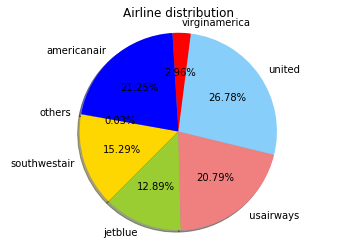

In [469]:
import matplotlib.pyplot as plt        
 
# Data to plot
labels = airlinelist
sizes = airlinevalues
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',"red",'blue','orange']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=170)
plt.title('Airline distribution') 
plt.axis('equal')
plt.show()

Ploting a graph for poitive negative and total tweets, to visualize the patern of tweets, reference stackoverflow

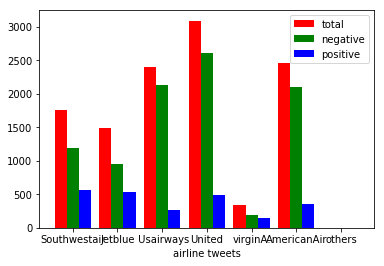

In [470]:
import numpy as np         
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = airlinevalues
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = neg
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = pos
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_xlabel('airline tweets')
ax.set_xticks(ind+width)
ax.set_xticklabels( ("Southwestair","Jetblue"," Usairways","United","virginA.","AmericanAir","others") )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('total', 'negative', 'positive') )

plt.show()

In [471]:
tweets[0:5]

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [472]:
tweets["date"][0][0:3]   #selecting day initial 3 words

'Mon'

In [473]:
a=[]      #defining empty list and appending all days in the list for getting a list of days 
for i in range(len(tweets)):
    b=tweets["date"][i][0:3]
    a.append(b)


ploting a graph of number of tweets per day to visualize everyday tweet counts to see the frequency distribution of tweets 

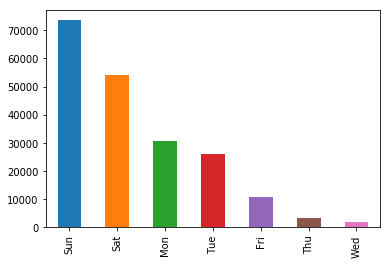

In [474]:
pd.Series(a).value_counts().plot('bar')#ploting a bar graph day wise for tweets

In [3]:
import pandas as pd
generic_df = pd.read_csv('generic_tweets.txt', header=0, names=["class","id","date","query","user","text"])
generic_df.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


From above graph we can see that maximum twets are on weekends and minimum tweets are on wednesday


# Model Preparation


importing files for  model preparation (logistic regression form sklearn)

In [475]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [476]:
x=tweets["text"]
y=tweets["class"]

spliting the tweets file into training and test data set for preparing logistic regression model

In [477]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

vectorize the text data (converting text data into numerical array)

In [478]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(x_train)#converting text to numerical array
tfidf_matrix_test = tfidf.transform(x_test)
print(tfidf_matrix_test)

  (0, 114726)	0.2312588803268828
  (0, 112747)	0.2262531515339607
  (0, 108025)	0.4007474375411282
  (0, 62969)	0.66222970343744
  (0, 50814)	0.15282201764597378
  (0, 50638)	0.1598063669378966
  (0, 37043)	0.3737325698492044
  (0, 31404)	0.3280449285127277
  (1, 111301)	0.2033391133606479
  (1, 104102)	0.1044030001208999
  (1, 95308)	0.21436374376831305
  (1, 91442)	0.38699137798615113
  (1, 71734)	0.13107983340843576
  (1, 59066)	0.3546296371214137
  (1, 47554)	0.2766170033104849
  (1, 47044)	0.22275373668588044
  (1, 45412)	0.4558059133154022
  (1, 39093)	0.14499146225861512
  (1, 24827)	0.5041599215973542
  (2, 112864)	0.3303344685225114
  (2, 107897)	0.20980547538244682
  (2, 104102)	0.07467240135142895
  (2, 102986)	0.13001700943865455
  (2, 102931)	0.1581500988343668
  (2, 102571)	0.15598618490604726
  :	:
  (59996, 31402)	0.38745807022461054
  (59996, 15466)	0.4494014406769677
  (59996, 11783)	0.4384426556186514
  (59997, 111144)	0.2792722636987888
  (59997, 110134)	0.147773135

# Model Implementation

In [482]:
import pandas as pd
us=pd.read_csv("US_airline_tweets.csv")
us[0:5]

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


cleaning the usairline file for regression

In [483]:
import re #removal of url, punctuation mark and html tags 
us["text"]=us["text"].str.lower()#converting to lower case
us["text"]=us["text"].str.replace(r'http\S+', '')
us["text"]=us["text"].str.replace(r'[^\w\s]','')
us["text"]=us["text"].str.replace('<[^<]+?>', '')
us["text"].head()

0    virginamerica plus youve added commercials to ...
1    virginamerica its really aggressive to blast o...
2    virginamerica and its a really big bad thing a...
3    virginamerica seriously would pay 30 a flight ...
4    virginamerica yes nearly every time i fly vx t...
Name: text, dtype: object

In [484]:
us.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica plus youve added commercials to ...
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica its really aggressive to blast o...
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica and its a really big bad thing a...
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously would pay 30 a flight ...
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica yes nearly every time i fly vx t...


removing stopwords using nltk library stopwords and given stopwords because N

In [485]:
import nltk          #removing stopwords using nltk stopwods and given stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stopwords=stopwordlist + stop
us['text']=us['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print(us[0:5]['text'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goldy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0     virginamerica youve commercials experience tacky
1    virginamerica aggressive blast obnoxious enter...
2                          virginamerica big bad thing
3    virginamerica seriously pay 30 flight seats di...
4          virginamerica time fly vx âœear wormâ wonât
Name: text, dtype: object


converting the sentiment to sentiment score 0 and 4 as to prepare model for applying trained logistic regression model

In [486]:
us["sentiment_score"]=us["sentiment"].apply(lambda x: int(4) if x== "positive" else int(0)) # applying lambda for sentiment score
us[0:5]

,id,sentiment,negative_reason,user,retweet_count,text,sentiment_score
0,5.703010e+17,positive,NaN,jnardino,0,virginamerica youve commercials experience tacky,4
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay 30 flight seats di...,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,virginamerica time fly vx âœear wormâ wonât,4


applying the trained logistic model for the us airline model

In [487]:
p=us["text"]         # assigning values 
q=us["sentiment_score"]

In [488]:
#vectorizing text data for application of model
tfidf_matrix_test = tfidf.transform(p)
print(tfidf_matrix_test[0:5])

  (0, 114791)	0.4598092411998679
  (0, 109432)	0.5072316533408034
  (0, 100112)	0.48518148740669603
  (0, 36395)	0.34872393454345185
  (0, 24074)	0.4174710209232697
  (1, 109432)	0.4013051055518706
  (1, 85168)	0.4151522751989305
  (1, 75430)	0.3601878420967368
  (1, 43838)	0.3275558626380441
  (1, 36739)	0.30661753409223846
  (1, 35041)	0.30661753409223846
  (1, 15326)	0.2776811916554866
  (1, 8410)	0.16056373047357853
  (1, 6480)	0.3723687631151187
  (2, 109432)	0.7700021843559848
  (2, 102908)	0.37189884856305744
  (2, 14641)	0.393957137226133
  (2, 12297)	0.3370247120806926
  (3, 109432)	0.436296821470997
  (3, 108373)	0.3484075574937546
  (3, 102908)	0.21072444836308535
  (3, 91391)	0.25864465049557334
  (3, 90874)	0.3484075574937546
  (3, 80700)	0.23735304665499699
  (3, 78752)	0.27566362241355524
  (3, 38782)	0.30879582992679855
  (3, 38557)	0.27501506199383946
  (3, 30182)	0.2392054071766429
  (3, 12297)	0.19096414740818943
  (3, 1489)	0.24200413254480763
  (4, 109893)	0.634980

In [489]:
us_n=us[us["sentiment"]=="negative"]  # sentment negative filtered dataframe
us_n[0:10]


,id,sentiment,negative_reason,user,retweet_count,text,sentiment_score
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay 30 flight seats di...,0
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfopdx schedule mia,0
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,0
16,5.702660e+17,negative,Can't Tell,MISSGJ,0,virginamerica fares three times carriers seats...,0
19,5.702570e+17,negative,Customer Service Issue,ayeevickiee,0,virginamerica guys messed seating reserved sea...,0
20,5.702490e+17,negative,Customer Service Issue,Leora13,0,virginamerica status match program applied thr...,0
21,5.702400e+17,negative,Can't Tell,meredithjlynn,0,virginamerica happened 2 ur vegan food options...,0
22,5.702080e+17,negative,Bad Flight,blackjackpro911,0,virginamerica amazing cant cold air vents vx35...,0


In [490]:
prediction=model.predict(tfidf_matrix_test)
len(prediction)
us["predicted"]=prediction
us_n[0:10]

,id,sentiment,negative_reason,user,retweet_count,text,sentiment_score
1,5.703010e+17,negative,Bad Flight,jnardino,0,virginamerica aggressive blast obnoxious enter...,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica big bad thing,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,virginamerica seriously pay 30 flight seats di...,0
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,virginamerica sfopdx schedule mia,0
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,virginamerica flew nyc sfo week fully sit seat...,0
16,5.702660e+17,negative,Can't Tell,MISSGJ,0,virginamerica fares three times carriers seats...,0
19,5.702570e+17,negative,Customer Service Issue,ayeevickiee,0,virginamerica guys messed seating reserved sea...,0
20,5.702490e+17,negative,Customer Service Issue,Leora13,0,virginamerica status match program applied thr...,0
21,5.702400e+17,negative,Can't Tell,meredithjlynn,0,virginamerica happened 2 ur vegan food options...,0
22,5.702080e+17,negative,Bad Flight,blackjackpro911,0,virginamerica amazing cant cold air vents vx35...,0


taking out number of given posiive/negative tweets and number of predicted positive/negative tweets

*for discussion question

In [491]:
pre_p=len(us[us["predicted"]==4])       #41.70% of total positve tweets are predicted (after finding the length predicted/given)
act_p=len(us[us["sentiment_score"]==4])

pre_n=len(us[us["predicted"]==0])       #64.5% of total negative tweets ae predicted(after finding the length predicted/given) 
act_n=len(us[us["sentiment_score"]==0]) # for a perticular prediction

values_p=[pre_p,act_p,pre_n,act_n]
names_p=["pre-pos","act-pos","pre-neg","act-neg"]
print(values_p)
pd.Series(us["predicted"]).value_counts()#found direct command to find the diffrent value count in column
us["text"][0] #checking the text value of first cell

[5908, 2363, 5633, 9178]


'virginamerica youve commercials experience tacky'

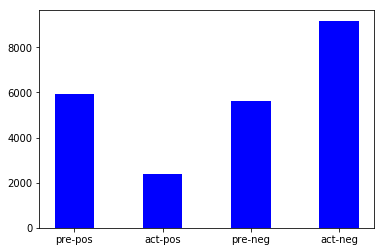

In [492]:
import matplotlib.pyplot as plt

plt.bar(names_p,values_p, width=float(0.45),color="blue")

plt.show()

Drawing a graph for actual 

finding the accuracy of a model

In [493]:
accuracy_1= accuracy_score(q,prediction)
print("accuracy of model implemented is " + str(accuracy_1*100) )

accuracy of model implemented is 64.36184039511308


filtering the usairline file consisting only negative sentiment

In [494]:
a=us_n["text"]                #assigning the values of column 
b=us_n["negative_reason"]   # b has multiple classes

splitting the train and test data doing multiclass regression

In [495]:
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.3)

vectorize the textdata into numerical arrays for performing logistic regression

In [496]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(a_train) #textdata transformation 
tfidf_matrix_test = tfidf.transform(a_test)
#print(tfidf_matrix_test)

applying multiclass logistic regression

In [497]:
model = LogisticRegression()
model.fit(tfidf_matrix,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

predicting the output for testdata input

In [498]:
prediction1 = model.predict(tfidf_matrix_test)

In [499]:
accuracy_t=accuracy_score(prediction1,b_test)   # finding accuracy of implemented model
print("Accuracy of implemented model is "+ str(accuracy_t*100))

Accuracy of implemented model is 59.00508351488744


# Result

The answer for research question :

(9178/11541)  "79.52%"  which indicates most of the customers (who are tweeting) are unsatisfied.least tweets are for VIrginamerica(excluding others) which is 2.96% 

model accuracy is (~79%) 
improving first model we can remove twitter handles which will improve the first model accuracy.
